In [1]:
import patoolib
patoolib.extract_archive("archive.zip",outdir="C:\\Users\\lenovo_laptop\\Sem7\\input")

patool: Extracting archive.zip ...
patool: ... archive.zip extracted to `C:\Users\lenovo_laptop\Sem7\input'.


'C:\\Users\\lenovo_laptop\\Sem7\\input'

In [2]:

import tensorflow as tf
tf.__version__


'2.12.0'

In [3]:
!pip install --user albumentations

In [4]:
!pip install torch


In [5]:
!pip install torchvision

In [6]:
import pandas as pd
import numpy as np
import os

import cv2

import albumentations as albu
from albumentations import Compose, ShiftScaleRotate, Resize
from albumentations.pytorch.0transforms import ToTensor


from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

from sklearn.metrics import confusion_matrix
import itertools
from sklearn.metrics import classification_report

import shutil

import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
IMAGE_HEIGHT = 224
IMAGE_WIDTH = 224
IMAGE_CHANNELS = 3

In [8]:
os.listdir('C:\\Users\\lenovo_laptop\\Sem7\\input\\rice_leaf_diseases')

['Bacterial leaf blight', 'Brown spot', 'Leaf smut']

In [9]:

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [10]:
leaf_smut_list = \
os.listdir('C:\\Users\\lenovo_laptop\\Sem7\\input\\rice_leaf_diseases\\Leaf smut')
brown_spot_list = \
os.listdir('C:\\Users\\lenovo_laptop\\Sem7\\input\\rice_leaf_diseases\\Brown spot')
bacterial_leaf_blight_list = \
os.listdir('C:\\Users\\lenovo_laptop\\Sem7\\input\\rice_leaf_diseases\\Bacterial leaf blight')

print(len(leaf_smut_list))
print(len(brown_spot_list))
print(len(bacterial_leaf_blight_list))

40
40
40


In [11]:
eaf_smut_list = os.listdir('/input/rice_leaf_diseases/Leaf smut')
brown_spot_list = os.listdir('/input/rice_leaf_diseases/Brown spot')
bacterial_leaf_blight_list = os.listdir('/input/rice_leaf_diseases/Bacterial leaf blight')

print(len(leaf_smut_list))
print(len(brown_spot_list))
print(len(bacterial_leaf_blight_list))

40
40
40


In [12]:
# Create the train and val sets

df_leaf_smut = pd.DataFrame(leaf_smut_list, columns=['image'])
df_leaf_smut['target'] = 'leaf_smut'

df_brown_spot = pd.DataFrame(brown_spot_list, columns=['image'])
df_brown_spot['target'] = 'brown_spot'

df_bacterial_leaf_blight = pd.DataFrame(bacterial_leaf_blight_list, columns=['image'])
df_bacterial_leaf_blight['target'] = 'bacterial_leaf_blight'


df_leaf_smut_val = df_leaf_smut.sample(n=5, random_state=101)
df_brown_spot_val = df_brown_spot.sample(n=5, random_state=101)
df_bacterial_leaf_blight_val = df_bacterial_leaf_blight.sample(n=5, random_state=101)
print(len(df_leaf_smut_val))
print(len(df_brown_spot_val))
print(len(df_bacterial_leaf_blight_val))

5
5
5


In [13]:
# Create the train set for each class

val_list = list(df_leaf_smut_val['image'])

df_leaf_smut_train = df_leaf_smut[~df_leaf_smut['image'].isin(val_list)] 

val_list = list(df_brown_spot_val['image'])
# filter out the val images
df_brown_spot_train = df_brown_spot[~df_brown_spot['image'].isin(val_list)] 

val_list = list(df_bacterial_leaf_blight_val['image'])

df_bacterial_leaf_blight_train = \
df_bacterial_leaf_blight[~df_bacterial_leaf_blight['image'].isin(val_list)] 

print(len(df_leaf_smut_train))
print(len(df_brown_spot_train))
print(len(df_bacterial_leaf_blight_train))

35
35
35


In [14]:
# Create df_data, df_train and df_val

df_data = pd.concat([df_leaf_smut, df_brown_spot, df_bacterial_leaf_blight], axis=0).reset_index(drop=True)

df_train = \
pd.concat([df_leaf_smut_train, df_brown_spot_train, df_bacterial_leaf_blight_train], axis=0).reset_index(drop=True)

df_val = \
pd.concat([df_leaf_smut_val, df_brown_spot_val, df_bacterial_leaf_blight_val], axis=0).reset_index(drop=True)

df_data = shuffle(df_data)
df_train = shuffle(df_train)
df_val = shuffle(df_val)

print(df_data.shape)
print(df_train.shape)
print(df_val.shape)

(120, 2)
(105, 2)
(15, 2)


In [15]:
df_data['target'].value_counts()

bacterial_leaf_blight    40
brown_spot               40
leaf_smut                40
Name: target, dtype: int64

In [16]:
df_train['target'].value_counts()

brown_spot               35
bacterial_leaf_blight    35
leaf_smut                35
Name: target, dtype: int64

In [17]:
df_val['target'].value_counts()

brown_spot               5
leaf_smut                5
bacterial_leaf_blight    5
Name: target, dtype: int64

In [18]:

# combine val, train and test
val_len = len(df_val)
train_len = len(df_train)
df_combined =  pd.concat(objs=[df_val, df_train], axis=0).reset_index(drop=True)


df_combined = pd.get_dummies(df_combined, columns=['target'])


df_val = df_combined[:val_len]
df_train = df_combined[val_len:]


print(df_train.shape)
print(df_val.shape)

(105, 4)
(15, 4)


In [19]:
df_combined.head()

image  target_bacterial_leaf_blight  target_brown_spot  \
0  DSC_0303.JPG                             0                  1   
1  DSC_0331.JPG                             0                  0   
2  DSC_0396.JPG                             1                  0   
3  DSC_0384.JPG                             1                  0   
4  DSC_0386.JPG                             1                  0   

   target_leaf_smut  
0                 0  
1                 1  
2                 0  
3                 0  
4                 0

In [20]:
df_train.head()

image  target_bacterial_leaf_blight  target_brown_spot  \
15  DSC_0112.jpg                             0                  1   
16  DSC_0375.JPG                             1                  0   
17  DSC_0378.JPG                             1                  0   
18  DSC_0501.jpg                             0                  0   
19  DSC_0512.jpg                             0                  0   

    target_leaf_smut  
15                 0  
16                 0  
17                 0  
18                 1  
19                 1

In [21]:
df_val.head()

image  target_bacterial_leaf_blight  target_brown_spot  \
0  DSC_0303.JPG                             0                  1   
1  DSC_0331.JPG                             0                  0   
2  DSC_0396.JPG                             1                  0   
3  DSC_0384.JPG                             1                  0   
4  DSC_0386.JPG                             1                  0   

   target_leaf_smut  
0                 0  
1                 1  
2                 0  
3                 0  
4                 0

In [1]:
# creating zip files in system
df_combined.to_csv('df_combined.csv.gz', compression='gzip', index=False)

df_train.to_csv('df_train.csv.gz', compression='gzip', index=False)
df_val.to_csv('df_val.csv.gz', compression='gzip', index=False)

NameError: name 'df_combined' is not defined

In [23]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 4428-1581

 Directory of C:\Users\lenovo_laptop\Sem7

10-10-2023  01:14    <DIR>          .
07-10-2023  22:28    <DIR>          ..
07-10-2023  21:49    <DIR>          .ipynb_checkpoints
07-10-2023  20:01        38,456,279 archive.zip
10-10-2023  01:15               492 df_combined.csv.gz
10-10-2023  01:15               450 df_train.csv.gz
10-10-2023  01:15               180 df_val.csv.gz
07-10-2023  20:24    <DIR>          input
10-10-2023  01:04            57,398 leaf_detection.ipynb
10-10-2023  00:31        51,359,872 model.h5
10-10-2023  00:37             3,802 training_log.csv
07-10-2023  21:47           471,499 Untitled.ipynb
               8 File(s)     90,349,972 bytes
               4 Dir(s)  89,874,341,888 bytes free


In [24]:
# Create a new directory
image_dir = 'image_dir'
os.mkdir(image_dir)


In [2]:
leaf_smut_list = \
os.listdir('/input/rice_leaf_diseases/Leaf smut')
brown_spot_list = \
os.listdir('/input/rice_leaf_diseases/Brown spot')
bacterial_leaf_blight_list = \
os.listdir('/input/rice_leaf_diseases/Bacterial leaf blight')


#  reading the images
for fname in leaf_smut_list:
    
    path = '/input/rice_leaf_diseases/Leaf smut/'
    
    
    src = os.path.join(path, fname)
    
    dst = os.path.join(image_dir, fname)
    shutil.copyfile(src, dst)

NameError: name 'os' is not defined

In [26]:
    
# reading the images
for fname in brown_spot_list:
    
    path = '/input/rice_leaf_diseases/Brown spot/'
    
    
    src = os.path.join(path, fname)
    
    dst = os.path.join(image_dir, fname)
    
    shutil.copyfile(src, dst)
    
    
    
    

for fname in bacterial_leaf_blight_list:
    
    path = '/input/rice_leaf_diseases/Bacterial leaf blight/'
    
    src = os.path.join(path, fname)
    
    dst = os.path.join(image_dir, fname)
    
    shutil.copyfile(src, dst)
       

In [27]:
# Check how many images are now in image_dir

len(os.listdir('image_dir'))

120

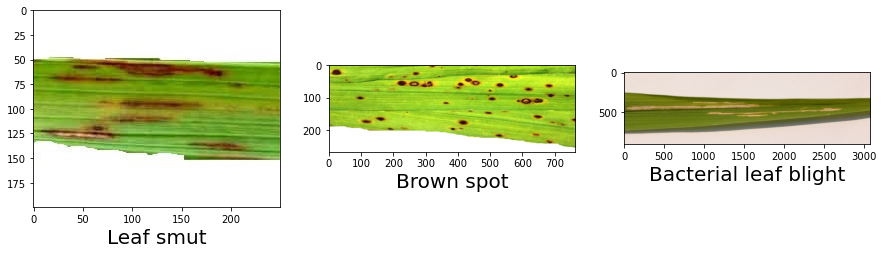

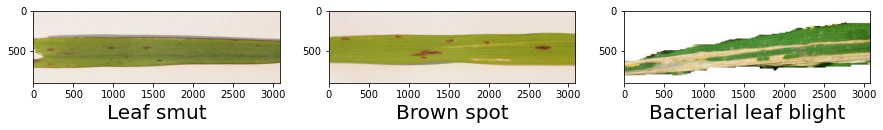

In [28]:
# set up the canvas for the subplots
plt.figure(figsize=(15,15))

# Image 1
plt.subplot(1,3,1)   # 1 row and 3 columns
item = 'DSC_0512.jpg'
path = '/input/rice_leaf_diseases/Leaf smut/' + item
image = plt.imread(path)
plt.imshow(image)
plt.xlabel('Leaf smut', fontsize=20)

# Image 2
plt.subplot(1,3,2)   # 1 row and 3 columns
item = 'DSC_0108.jpg'
path = '/input/rice_leaf_diseases/Brown spot/' + item
image = plt.imread(path)
plt.imshow(image)
plt.xlabel('Brown spot', fontsize=20)

# Image 2
plt.subplot(1,3,3)   # 1 row and 3 columns
item = 'DSC_0402.JPG'
path = '/input/rice_leaf_diseases/Bacterial leaf blight/' + item
image = plt.imread(path)
plt.imshow(image)
plt.xlabel('Bacterial leaf blight', fontsize=20)






# set up the canvas for the subplots
plt.figure(figsize=(15,15))

# Image 1
plt.subplot(1,3,1)   # 1 row and 3 columns
item = 'DSC_0316.JPG'
path = '/input/rice_leaf_diseases/Leaf smut/' + item
image = plt.imread(path)
plt.imshow(image)
plt.xlabel('Leaf smut', fontsize=20)

# Image 2
plt.subplot(1,3,2)   # 1 row and 3 columns
item = 'DSC_0303.JPG'
path = '/input/rice_leaf_diseases/Brown spot/' + item
image = plt.imread(path)
plt.imshow(image)
plt.xlabel('Brown spot', fontsize=20)

# Image 2
plt.subplot(1,3,3)   # 1 row and 3 columns
item = 'DSC_0702.jpg'
path = '/input/rice_leaf_diseases/Bacterial leaf blight/' + item
image = plt.imread(path)
plt.imshow(image)
plt.xlabel('Bacterial leaf blight', fontsize=20)

plt.show()

In [29]:

import albumentations as albu


def augment_image(augmentation, image):
    
    aug_image_dict =  augmentation(image=image)
    
    image_matrix = aug_image_dict['image']
    
    
    return image_matrix

In [30]:
# Define the transforms


aug_types = albu.Compose([
            albu.HorizontalFlip(),
             albu.OneOf([
                albu.HorizontalFlip(),
                albu.VerticalFlip(),
                ], p=0.8),
            albu.OneOf([
                albu.RandomContrast(),
                albu.RandomGamma(),
                albu.RandomBrightness(),
                ], p=0.3),
            albu.OneOf([
                albu.ElasticTransform(alpha=120, sigma=120 * 0.05, alpha_affine=120 * 0.03),
                albu.GridDistortion(),
                albu.OpticalDistortion(distort_limit=2, shift_limit=0.5),
                ], p=0.3),
            albu.ShiftScaleRotate()
            ])

C:\Users\lenovo_laptop\AppData\Roaming\Python\Python39\site-packages\albumentations\augmentations\transforms.py:1284: FutureWarning: RandomContrast has been deprecated. Please use RandomBrightnessContrast
  warnings.warn(
C:\Users\lenovo_laptop\AppData\Roaming\Python\Python39\site-packages\albumentations\augmentations\transforms.py:1258: FutureWarning: This class has been deprecated. Please use RandomBrightnessContrast
  warnings.warn(


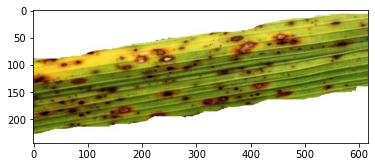

In [31]:
# Get an image to test transformations

path = 'image_dir/'
image_list = os.listdir('image_dir')

fname = image_list[1]
image_path = path + fname

image = plt.imread(image_path)
plt.imshow(image)

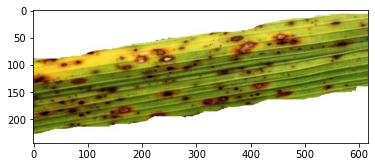

In [32]:


aug_image = augment_image(aug_types, image)

plt.imshow(aug_image)

In [33]:
df_train.head()

image  target_bacterial_leaf_blight  target_brown_spot  \
15  DSC_0112.jpg                             0                  1   
16  DSC_0375.JPG                             1                  0   
17  DSC_0378.JPG                             1                  0   
18  DSC_0501.jpg                             0                  0   
19  DSC_0512.jpg                             0                  0   

    target_leaf_smut  
15                 0  
16                 0  
17                 0  
18                 1  
19                 1

In [34]:
def train_generator(batch_size=8):
    
    while True:
        
        # load the data in chunks (batches)
        for df in pd.read_csv('df_train.csv.gz', chunksize=batch_size):
            
            # get the list of images
            image_id_list = list(df['image'])
            
            # Create empty X matrix - 3 channels
            X_train = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS), dtype=np.uint8)
            

        
            
            # Create X_train
            #================
            
            for i in range(0, len(image_id_list)):
              
              
                # get the image and mask
                image_id = image_id_list[i]


                # set the path to the image
                path = 'image_dir/' + image_id
                          # read the image
                image = cv2.imread(path)
                
                # convert to from BGR to RGB
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                
                # resize the image
                image = cv2.resize(image, (IMAGE_HEIGHT, IMAGE_WIDTH))
                
                
            
            
            # Create y_train
            # ===============
                cols = ['target_bacterial_leaf_blight', 'target_brown_spot', 'target_leaf_smut']
                y_train = df[cols]
                y_train = np.asarray(y_train) 

                # change the shape to (batch_size, 1)
                #y_train = y_train.reshape((-1, 1)) # -1 tells numpy to automatically detect the batch size
                         
            # Augment the image and mask
            # ===========================

                aug_image = augment_image(aug_types, image)
              
                # insert the image into X_train
                X_train[i] = aug_image
                
                          
                
            # Normalize the images
            X_train = X_train/255

            yield X_train, y_train

In [35]:
# Test the generator

# initialize
train_gen = train_generator(batch_size=8)

# run the generator
X_train, y_train = next(train_gen)

print(X_train.shape)
print(y_train.shape)

(8, 224, 224, 3)
(8, 3)


In [36]:
y_train

array([[0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0]], dtype=int64)

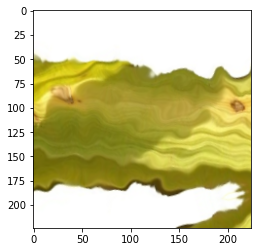

In [37]:
# Print the first image in X_train
# Remember that train images have been augmented.

image = X_train[0,:,:,:]
plt.imshow(image)

In [38]:
def val_generator(batch_size=5):
    
    while True:
        
        # load the data in chunks (batches)
        for df in pd.read_csv('df_val.csv.gz', chunksize=batch_size):
            
            # get the list of images
            image_id_list = list(df['image'])
            
            # Create empty X matrix - 3 channels
            X_val = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS), dtype=np.uint8)
            

        
            
            # Create X_val
            #================
            
            for i in range(0, len(image_id_list)):
              
              
                # get the image and mask
                image_id = image_id_list[i]

# set the path to the image
                path = 'image_dir/' + image_id

                # read the image
                image = cv2.imread(path)
                
                # convert to from BGR to RGB
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                
                # resize the image
                image = cv2.resize(image, (IMAGE_HEIGHT, IMAGE_WIDTH))

                # insert the image into X_train
                X_val[i] = image
                
                
            
            
            # Create y_val
            # ===============

                cols = ['target_bacterial_leaf_blight', 'target_brown_spot', 'target_leaf_smut']
                y_val = df[cols]
                y_val = np.asarray(y_val) 

                # change the shape to (batch_size, 1)
                #y_val = y_val.reshape((-1, 1)) # -1 tells numpy to automatically detect the batch size
                                     
                
            # Normalize the images
            X_val = X_val/255

            yield X_val, y_val

In [39]:
# Test the generator

# initialize
val_gen = val_generator(batch_size=5)

# run the generator
X_val, y_val = next(val_gen)

print(X_val.shape)
print(y_val.shape)

(5, 224, 224, 3)
(5, 3)


In [40]:
y_val

array([[0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=int64)

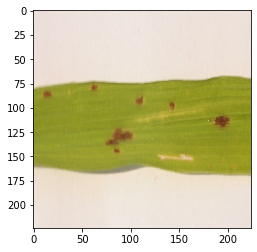

In [41]:
# print the image from X_val
image = X_val[0,:,:,:]
plt.imshow(image)

In [42]:
def test_generator(batch_size=1):
    
    while True:
        
        # load the data in chunks (batches)
        for df in pd.read_csv('df_val.csv.gz', chunksize=batch_size):
            
            # get the list of images
            image_id_list = list(df['image'])
            
            # Create empty X matrix - 3 channels
            X_test = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS), dtype=np.uint8)
            

        
            
            # Create X_test
            #================
            
            for i in range(0, len(image_id_list)):
              
              
                # get the image and mask
                image_id = image_id_list[i]


                # set the path to the image
                path = 'image_dir/' + image_id
                
                # read the image
                image = cv2.imread(path)
                
                # convert to from BGR to RGB
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                
                # resize the image
                image = cv2.resize(image, (IMAGE_HEIGHT, IMAGE_WIDTH))

                # insert the image into X_train
                X_test[i] = image
                
                 
                
            # Normalize the images
            X_test = X_test/255

            yield X_test

In [43]:
# Test the generator

# initialize
test_gen = test_generator(batch_size=1)

# run the generator
X_test = next(test_gen)

print(X_test.shape)

(1, 224, 224, 3)


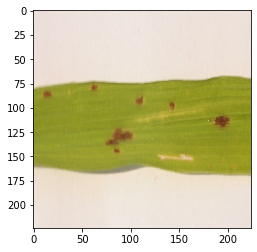

In [44]:
# print the image from X_test

image = X_test[0,:,:,:]
plt.imshow(image)

In [45]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.metrics import categorical_accuracy

from tensorflow.keras.callbacks import (EarlyStopping, ReduceLROnPlateau, 
                                        ModelCheckpoint, CSVLogger, LearningRateScheduler)

In [46]:
from tensorflow.keras.applications.mobilenet import MobileNet

model = MobileNet(weights='imagenet')

# Exclude the last 2 layers of the above model.
x = model.layers[-2].output

# Create a new dense layer for predictions
# 3 corresponds to the number of classes
predictions = Dense(3, activation='softmax')(x)

# inputs=model.input selects the input layer, outputs=predictions refers to the
# dense layer we created above.

model = Model(inputs=model.input, outputs=predictions)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [47]:
TRAIN_BATCH_SIZE = 8
VAL_BATCH_SIZE = 5

num_train_samples = len(df_train)
num_val_samples = len(df_val)
train_batch_size = TRAIN_BATCH_SIZE
val_batch_size = VAL_BATCH_SIZE

# determine numtrain steps
train_steps = np.ceil(num_train_samples / train_batch_size)
# determine num val steps
val_steps = np.ceil(num_val_samples / val_batch_size)

In [77]:
# Initialize the generators
train_gen = train_generator(batch_size=TRAIN_BATCH_SIZE)
val_gen = val_generator(batch_size=VAL_BATCH_SIZE)

model.compile(
    Adam(lr=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)



filepath = "model.h5"

#earlystopper = EarlyStopping(patience=10, verbose=1)

checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, 
                             save_best_only=True, mode='max')

#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, 
                                   #verbose=1, mode='min')




log_fname = 'training_log.csv'
csv_logger = CSVLogger(filename=log_fname,
                       separator=',',
                       append=False)

callbacks_list = [checkpoint, csv_logger]

history = model.fit_generator(train_gen, steps_per_epoch=train_steps, epochs=20, 
                              validation_data=val_gen, validation_steps=val_steps,
                             verbose=1,
                             callbacks=callbacks_list)

C:\Users\LENOVO~1\AppData\Local\Temp/ipykernel_3852/2959189333.py:33: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_gen, steps_per_epoch=train_steps, epochs=20,


Epoch 1/20
14/14 [==============================] - ETA: 0s - loss: 0.5089 - accuracy: 0.8857
Epoch 1: val_accuracy improved from -inf to 0.86667, saving model to model.h5
14/14 [==============================] - 22s 1s/step - loss: 0.5089 - accuracy: 0.8857 - val_loss: 2.5609 - val_accuracy: 0.8667
Epoch 2/20
14/14 [==============================] - ETA: 0s - loss: 0.8007 - accuracy: 0.8952
Epoch 2: val_accuracy did not improve from 0.86667
14/14 [==============================] - 13s 918ms/step - loss: 0.8007 - accuracy: 0.8952 - val_loss: 0.7188 - val_accuracy: 0.8667
Epoch 3/20
14/14 [==============================] - ETA: 0s - loss: 0.1790 - accuracy: 0.9143
Epoch 3: val_accuracy did not improve from 0.86667
14/14 [==============================] - 12s 895ms/step - loss: 0.1790 - accuracy: 0.9143 - val_loss: 1.1790 - val_accuracy: 0.6667
Epoch 4/20
14/14 [==============================] - ETA: 0s - loss: 0.1650 - accuracy: 0.9429
Epoch 4: val_accuracy did not improve from 0.86667


In [78]:
# Display the training log

train_log = pd.read_csv('training_log.csv')

train_log.head(10)

epoch  accuracy      loss  val_accuracy  val_loss
0      0  0.885714  0.508909      0.866667  2.560949
1      1  0.895238  0.800730      0.866667  0.718806
2      2  0.914286  0.178952      0.666667  1.178999
3      3  0.942857  0.165036      0.733333  1.510240
4      4  0.961905  0.122564      0.733333  1.182596
5      5  0.942857  0.102458      0.800000  0.905338
6      6  0.980952  0.069163      0.800000  0.919655
7      7  0.971429  0.073410      0.866667  0.490380
8      8  0.952381  0.179452      0.933333  0.239202
9      9  0.952381  0.133930      0.800000  1.294430

In [79]:
# get the metric names so we can use evaulate_generator
model.metrics_names

['loss', 'accuracy']

In [80]:
model.load_weights('model.h5')

val_gen = val_generator(batch_size=1)

val_loss, val_acc = \
model.evaluate_generator(val_gen, 
                        steps=len(df_val))

print('val_loss:', val_loss)
print('val_acc:', val_acc)

C:\Users\LENOVO~1\AppData\Local\Temp/ipykernel_3852/4140564657.py:6: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(val_gen,


val_loss: 0.23920229077339172
val_acc: 0.9333333373069763


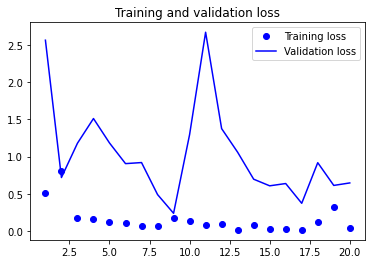

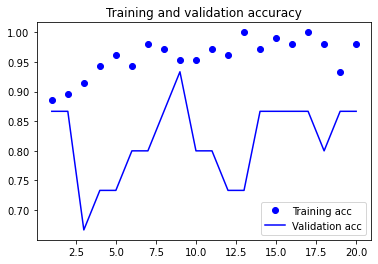

<Figure size 432x288 with 0 Axes>

In [81]:
# display the loss and accuracy curves

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()


plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.show()


In [82]:
test_gen = test_generator(batch_size=1)

preds = model.predict_generator(test_gen, steps=len(df_val), verbose=1)

C:\Users\LENOVO~1\AppData\Local\Temp/ipykernel_3852/1196638431.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  preds = model.predict_generator(test_gen, steps=len(df_val), verbose=1)


15/15 [==============================] - 1s 44ms/step


In [83]:
# get y_pred as index values

y_pred = np.argmax(preds, axis=1)

y_pred


array([1, 2, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 2, 2, 2], dtype=int64)

In [84]:
# get y_true as index values

cols = ['target_bacterial_leaf_blight', 'target_brown_spot', 'target_leaf_smut']
y_true = df_val[cols]
y_true = np.asarray(y_true) 

y_true = np.argmax(y_true, axis=1)

y_true

array([1, 2, 0, 0, 0, 1, 0, 0, 1, 1, 2, 1, 2, 2, 2], dtype=int64)

In [85]:
# Compare y_true and y_pred

print(y_pred)
print(y_true)

[1 2 0 0 0 1 0 0 1 1 1 1 2 2 2]
[1 2 0 0 0 1 0 0 1 1 2 1 2 2 2]


In [86]:
from sklearn.metrics import confusion_matrix
import itertools

cm = confusion_matrix(y_true, y_pred)

Confusion matrix, without normalization
[[5 0 0]
 [0 5 0]
 [0 1 4]]


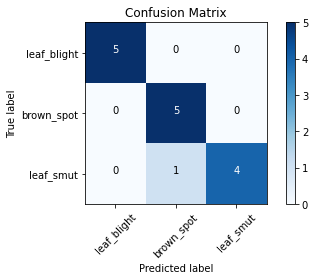

In [87]:
# bacterial_leaf_blight = 0
# brown_spot = 1
# leaf_smut = 2

cm_plot_labels = ['leaf_blight', 'brown_spot', 'leaf_smut']

plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

In [88]:
from sklearn.metrics import classification_report

# Generate a classification report
report = classification_report(y_true, y_pred, target_names=['bacterial_leaf_blight', 'brown_spot', 'leaf_smut'])

print(report)

                       precision    recall  f1-score   support

bacterial_leaf_blight       1.00      1.00      1.00         5
           brown_spot       0.83      1.00      0.91         5
            leaf_smut       1.00      0.80      0.89         5

             accuracy                           0.93        15
            macro avg       0.94      0.93      0.93        15
         weighted avg       0.94      0.93      0.93        15

